In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

In [ ]:
import os.path, time
print("created: %s" % time.ctime(os.path.getctime('/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb')))

created: Tue Jan  5 09:42:50 2021


In [ ]:
%load_ext google.colab.data_table

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/BOW.csv")
data2 = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data.json")
#data3 = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/No Sabe.csv",sep="	")
data4 = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/TF-IDF.csv")

In [ ]:
print("BOW: " + str(data1.shape[0]) + " lignes et " + str(data1.shape[1]) + " colonnes.")
print("Data: " + str(data2.shape[0]) + " lignes et " + str(data2.shape[1]) + " colonnes.")
#print("No Sabe: " + str(data3.shape[0]) + " lignes et " + str(data3.shape[1]) + " colonnes.")
print("TF-IDF: " + str(data4.shape[0]) + " lignes et " + str(data4.shape[1]) + " colonnes.")

BOW: 12261 lignes et 4820 colonnes.
Data: 12261 lignes et 13 colonnes.
TF-IDF: 12261 lignes et 4820 colonnes.


In [ ]:
data2.columns
#wtf c est quoi ca? LE BORDEL

Index(['art_id', 'art_content', 'art_content_html', 'art_extract_datetime',
       'art_lang', 'art_title', 'art_url', 'src_name', 'src_type', 'src_url',
       'src_img', 'art_auth', 'art_tag'],
      dtype='object')

In [ ]:
data1.head(3)

,000,01,02,03,04,06,07,08,09,10,100,1000,11,110,118,11h,12,120,13,14,15,150,1500,16,17,18,180,19,1997,1998,1999,1er,20,200,2000,2001,2002,2003,2004,2005,...,étendue,éthique,étions,étranger,étrangers,étrangères,étroite,étroitement,étude,études,étudiant,étudiants,étudier,été,évaluation,évaluer,évalué,éventuellement,éventuelles,évidemment,évidence,évident,éviter,évolue,évoluent,évoluer,évolutif,évolution,évolutions,évolué,évoque,évoquer,évoqué,événement,événements,êtes,être,île,œuvre,art_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
data2.head(100)

,art_id,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag
0,0,,None,7 décembre 2018,fr,4ème Conférence Nationale de l’Emploi Territor...,http://fncdg.com/4eme-conference-nationale-de-...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2018/12/ra...,None,None
1,1,La FNCDG et l’ANDCDG ont publié en septembre l...,"<p style=""text-align: justify;"">La FNCDG et l’...",22 septembre 2020,fr,9ème édition du Panorama de l’emploi territorial,http://fncdg.com/9eme-edition-du-panorama-de-l...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/09/im...,None,None
2,2,Malgré la levée des mesures de confinement le ...,"<p style=""text-align: justify;"">Malgré la levé...",17 mars 2020,fr,ACTUALITÉS FNCDG / COVID19,http://fncdg.com/actualites-covid19/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/03/co...,None,None
3,3,,None,28 juin 2017,fr,Arrêté de création GIP,http://fncdg.com/arrete-de-creation-gip/,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2017/05/fo...,None,None
4,4,,None,24 novembre 2017,fr,Article Acteurs Publics « Les centres de gesti...,http://fncdg.com/article-acteurs-publics-les-c...,FNCDG,xpath_source,http://fncdg.com/actualites/,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Le SGMAP (Secrétariat Général pour la Modernis...,"<div class=""teaser col-12""><p>Le <strong>SGMAP...",09/06/2020,fr,Un nouveau HUB d'Echange : le SGMAP facilite v...,/actualites/un-nouveau-hub-dechange-le-sgmap-f...,JVS mairistem,xpath_source,www.jvs-mairistem.fr,https://www.jvs-mairistem.fr/sites/jvs/files/s...,marie,['#Transformation numérique']
96,96,Dominique Parnisari travaille chaque semaine d...,"<div class=""teaser col-12""><p><span><span><spa...",04/05/2020,fr,Travailler en confinement : comment Dominique ...,/actualites/travailler-en-confinement-comment-...,JVS mairistem,xpath_source,www.jvs-mairistem.fr,https://www.jvs-mairistem.fr/sites/jvs/files/s...,Margot Tison,"['#Télétravail', '#Cloud', '#Horizon Cloud', '..."
97,97,Selon les données du spécialiste de la cybersé...,"<div class=""teaser col-12""><p>Selon les donnée...",28/04/2020,fr,Les piratages lors du confinement augmentent :...,/actualites/les-piratages-lors-du-confinement-...,JVS mairistem,xpath_source,www.jvs-mairistem.fr,https://www.jvs-mairistem.fr/sites/jvs/files/s...,Margot Tison,"['#Sécurité', '#Dématérialisation', '#Cloud']"
98,98,Dans le cadre d'un webinaire organisé par les ...,"<div class=""teaser col-12""><p>Dans le cadre d'...",06/04/2020,fr,WEBINAIRE [Replay] : Les outils indispensables...,/actualites/webinaire-replay-les-outils-indisp...,JVS mairistem,xpath_source,www.jvs-mairistem.fr,https://www.jvs-mairistem.fr/sites/jvs/files/s...,Marat Anaev,"['#Dématérialisation', '#Cloud', '#Collaboratif']"


In [ ]:
print(data2.pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/BOW.csv")[2])

['Malgré la levée des mesures de confinement le 11 mai 2020, la plupart des mesures sanitaires prises pendant la période d’urgence sanitaire devront se poursuivre afin d’éviter une recrudescence de l’épidémie de covid-19', ' Ainsi, avec la reprise progressive de l’activité, les employeurs publics, les agents et les services de santé et sécurité au travail des Centres de Gestion auront un rôle important à jouer à cet égard', ' « Le guide du déconfinement : comment préparer la reprise d’activité » est une contribution issue d’un travail collaboratif entre les Centres de Gestion, l’ANDCDG et la FNCDG et a pour vocation de constituer un appui aux collectivités et établissements pour la reprise de l’activité, dans un contexte où les enjeux RH sont nombreux et complexes… Ce document s’organise autour de plusieurs parties et notamment la méthodologie de mise en place d’un plan de reprise d’activité et les mesures pratiques et organisationnelles à prévoir pour cette reprise', ' Télécharger le 

In [ ]:
total2 = data2.isnull().sum().sort_values(ascending=False)
percent2 = (data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data2.head(20)
#missing_data2.Total.sum()

,Total,Percent
art_auth,9123,0.744067
src_img,4933,0.402333
art_tag,1636,0.133431
art_extract_datetime,620,0.050567
art_content_html,596,0.048609
art_lang,105,0.008564
src_url,0,0.000000
src_type,0,0.000000
src_name,0,0.000000
art_url,0,0.000000


In [ ]:
print(data4.head(3))

   000   01   02   03   04   06  ...  événements  êtes  être  île  œuvre  art_id
0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   0.0   0.0  0.0    0.0       0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   0.0   0.0  0.0    0.0       1
2  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   0.0   0.0  0.0    0.0       2

[3 rows x 4820 columns]


In [ ]:
raw_tags=data2["art_tag"].values
tags=[]
set_of_tags= set()
for tag in raw_tags:
  if tag!=None:
    if tag[0]=='[':
      list_of_tags=eval(tag)
      for tag_in_list in list_of_tags:
        tags.append(tag_in_list)
    else:
      tags.append(i)
for tag in tags:
  if tag!='' and tag!=None:
    tag=tag.lower()
    if tag[0]=='#':
      tag=tag[1:]
    set_of_tags.add(tag)
print(set_of_tags)
len(set_of_tags)

{'collectivité locale', 'calculateurs', 'prélèvement obligatoire', 'politique monétaire', 'aménagement', 'référendum', 'smart data', 'programme scolaire', 'institution', 'e-administration', 'cluster', 'egalité professionnelle', 'administration', 'immigration', 'réseau', 'bureau', 'qatar', 'finances locales', 'personne âgée', 'mode collaboratif', 'circulation', 'ville', 'maddy keynote', 'humain', 'restauration', 'essaimage', 'rgpd', 'robot', 'dossier santé', 'electronique', 'cloud', 'enseignement professionnel', 'transition digitale', 'communication', 'exclusion sociale', 'procédure judiciaire', 'écoparc', 'chômage', 'taxes', 'gaspar', 'fibre optique', 'assistant digital', 'pavic', 'télétravail', 'politique budgétaire', 'partage', 'assistance', 'solutions rh', 'renouvellement urbain', 'cartographie', 'malakoff médéric', 'décentralisation', 'sauvegarde', 'tramway', 'travail dissimulé', 'téléphone', 'axelle lemaire', 'attractivité', 'aviation civile', 'open data', 'ministère', 'liberté', 

1051

In [ ]:
for i in set_of_tags:
  print(i)
print(comp)

nuages des points

In [ ]:
! pip install -U spacy
! python -m spacy download fr_core_news_sm
import spacy
nlp = spacy.load('fr')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('french'))

In [ ]:
article=data2["art_content"].values[2]
print(article)


def text_cleaner(text):
  tokens=nltk.word_tokenize(text)
  cleantokens=[]
  for token in tokens:
    if token not in stopWords:
      if len(token)>1 and token.lower() not in ["le","la","ce","cet","cette","ces","cettes"]:
        cleantokens.append(token)
  return cleantokens
result=text_cleaner(article)


Malgré la levée des mesures de confinement le 11 mai 2020, la plupart des mesures sanitaires prises pendant la période d’urgence sanitaire devront se poursuivre afin d’éviter une recrudescence de l’épidémie de covid-19. Ainsi, avec la reprise progressive de l’activité, les employeurs publics, les agents et les services de santé et sécurité au travail des Centres de Gestion auront un rôle important à jouer à cet égard. « Le guide du déconfinement : comment préparer la reprise d’activité » est une contribution issue d’un travail collaboratif entre les Centres de Gestion, l’ANDCDG et la FNCDG et a pour vocation de constituer un appui aux collectivités et établissements pour la reprise de l’activité, dans un contexte où les enjeux RH sont nombreux et complexes… Ce document s’organise autour de plusieurs parties et notamment la méthodologie de mise en place d’un plan de reprise d’activité et les mesures pratiques et organisationnelles à prévoir pour cette reprise. Télécharger le guide


In [ ]:
! pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

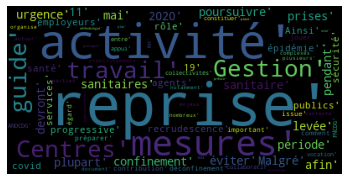

In [ ]:
def generate_wordcloud(text):
  if len(text)>0:
    wordcloud = WordCloud(relative_scaling = 1.0,).generate(str(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()

generate_wordcloud(result)

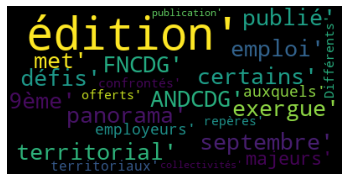

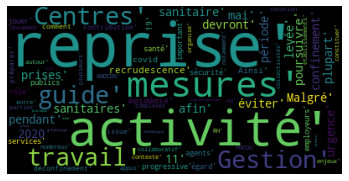

<Figure size 432x288 with 0 Axes>

In [ ]:
def nuage_article(article):
  mots=text_cleaner(article)
  generate_wordcloud(mots)


#nuage_article(article)

def nuage_articles_ens(articles):
  text_total=""
  for i in articles:
    text_total=text_total+' '+i
  mots=text_cleaner(text_total)
  generate_wordcloud(mots)

articles=data2["art_content"].values[1:5]
#nuage_articles_ens(articles)

def nuage_articles_iter(articles):
  for i in articles:
    nuage_article(i)
    plt.clf()
nuage_articles_iter(articles)

La FNCDG et l’ANDCDG ont publié en septembre la 9ème édition du panorama de l’emploi territorial. Cette édition met en exergue certains défis majeurs auxquels les employeurs territoriaux sont confrontés. Différents repères sont offerts aux collectivités par cette publication :
Malgré la levée des mesures de confinement le 11 mai 2020, la plupart des mesures sanitaires prises pendant la période d’urgence sanitaire devront se poursuivre afin d’éviter une recrudescence de l’épidémie de covid-19. Ainsi, avec la reprise progressive de l’activité, les employeurs publics, les agents et les services de santé et sécurité au travail des Centres de Gestion auront un rôle important à jouer à cet égard. « Le guide du déconfinement : comment préparer la reprise d’activité » est une contribution issue d’un travail collaboratif entre les Centres de Gestion, l’ANDCDG et la FNCDG et a pour vocation de constituer un appui aux collectivités et établissements pour la reprise de l’activité, dans un contexte

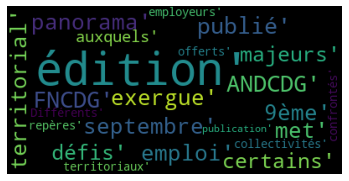

In [ ]:
for i in articles:
  print(i)
nuage_article(data2["art_content"].values[1])